In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pwd

'/Users/ratikpant'

In [4]:
df = pd.read_csv("/Users/ratikpant/desktop/portfolio practice/train.csv")


# Objective: Predict whether a user is a high spender (1) or not (0) based on their purchase behavior. Type: Binary Classification Problem,Model Output: 1 (High Spender) or 0 (Low Spender)



In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


# Business problem - The e-commerce company wants to identify which age groups buys the most  during the black friday and wants to build a model that can identify high and low spenders to optimise the supply side and also keep the inventory management healthy.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
df.duplicated().sum()

0

<Axes: >

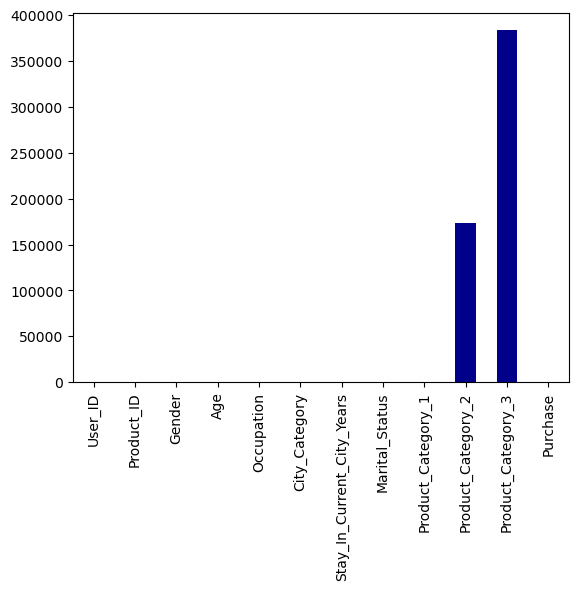

In [9]:
#missing value
df.isnull().sum().plot(kind = 'bar', color =  'darkblue')

In [10]:
#handling missing values in category product_2: Mode method

In [11]:
mode_age_prod2 = df.groupby('Age')['Product_Category_2'].agg(lambda m : m.mode()[0] )
print(mode_age_prod2)
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Age'].map(mode_age_prod2))
df.isnull().sum()

Age
0-17     4.0
18-25    8.0
26-35    8.0
36-45    8.0
46-50    8.0
51-55    8.0
55+      8.0
Name: Product_Category_2, dtype: float64


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            383247
Purchase                           0
dtype: int64

In [12]:
#changing the dtype of product category 2 to int
df['Product_Category_2'].astype(int)

0          4
1          6
2          4
3         14
4          8
          ..
550063     8
550064     8
550065     8
550066     8
550067     8
Name: Product_Category_2, Length: 550068, dtype: int64

In [13]:
#checking on product category 3 how its data is among the different age group
mode_product3 = df.groupby('Age')['Product_Category_3'].agg(lambda m: m.mode()[0])
print(mode_product3)

Age
0-17     16.0
18-25    16.0
26-35    16.0
36-45    16.0
46-50    16.0
51-55    16.0
55+      16.0
Name: Product_Category_3, dtype: float64


In [14]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

In [15]:
#since an extrapolation would mean 16 will be the famous category for product 3 
#we fill the remaining with the category popular among ages



In [16]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Age'].map(mode_product3))
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [17]:
#changing necessary dtype 
df['Product_Category_3'].astype(int)


0         16
1         14
2         16
3         16
4         16
          ..
550063    16
550064    16
550065    16
550066    16
550067    16
Name: Product_Category_3, Length: 550068, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [19]:
#renaming column Stay_In_Current_City_Years
df.rename(columns = {'Stay_In_Current_City_Years': 'current_city_years'}, inplace = True)
df['current_city_years'] = df['current_city_years'].replace({ '4+' : 4}).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   User_ID             550068 non-null  int64  
 1   Product_ID          550068 non-null  object 
 2   Gender              550068 non-null  object 
 3   Age                 550068 non-null  object 
 4   Occupation          550068 non-null  int64  
 5   City_Category       550068 non-null  object 
 6   current_city_years  550068 non-null  int64  
 7   Marital_Status      550068 non-null  int64  
 8   Product_Category_1  550068 non-null  int64  
 9   Product_Category_2  550068 non-null  float64
 10  Product_Category_3  550068 non-null  float64
 11  Purchase            550068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 50.4+ MB


In [20]:
df['current_city_years'].value_counts()

current_city_years
1    193821
2    101838
3     95285
4     84726
0     74398
Name: count, dtype: int64

In [21]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [22]:
df['City_Category'] = df['City_Category'].replace({'A': 1, 'B': 2, 'C': 3}).astype(int)

In [23]:
#cleaned dataset ready for visualisation and solving the business problems.
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,current_city_years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,1,2,0,3,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,1,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,1,2,0,12,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,1,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,3,4,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,2,1,1,20,8.0,16.0,368
550064,1006035,P00375436,F,26-35,1,3,3,0,20,8.0,16.0,371
550065,1006036,P00375436,F,26-35,15,2,4,1,20,8.0,16.0,137
550066,1006038,P00375436,F,55+,1,3,2,0,20,8.0,16.0,365


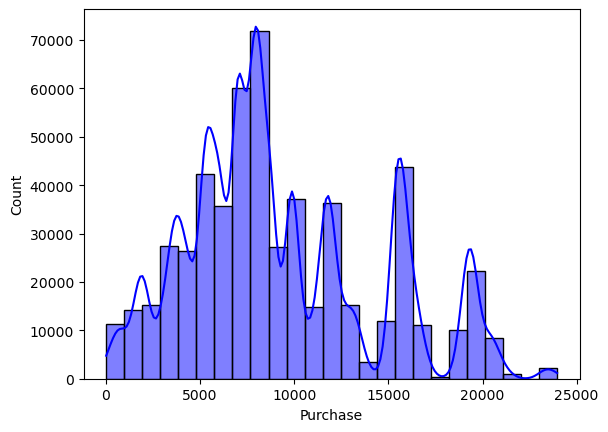

In [24]:
#checking on the purchase across the dataset.
sns.histplot(data = df, x = 'Purchase', kde = True, bins= 25, color = 'blue') 
plt.show()

<Axes: >

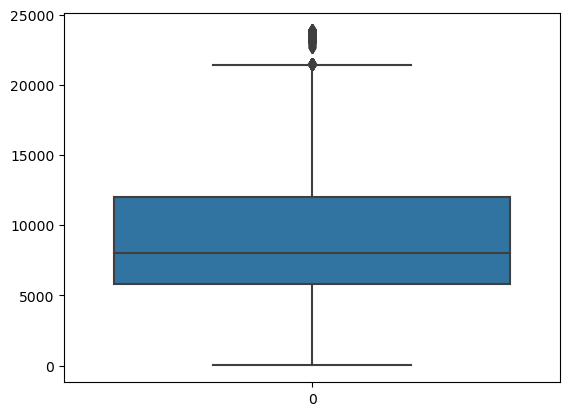

In [25]:
#checking for outliers in purchase which can cause misjudgement later while training the model.
sns.boxplot(df['Purchase'])

In [26]:
#outlier treatment
q1 = df['Purchase'].quantile(0.25)
q3 = df['Purchase'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr



<Axes: xlabel='Purchase', ylabel='Count'>

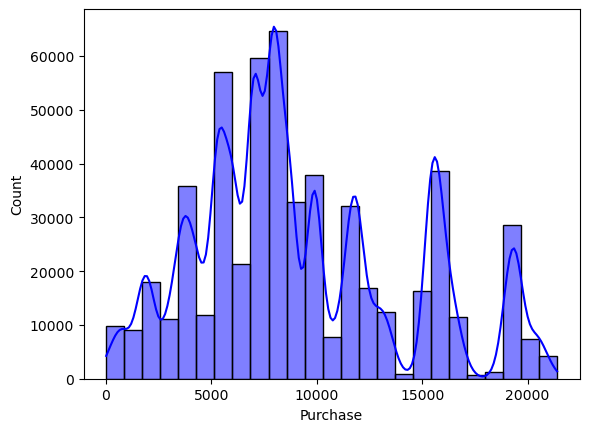

In [27]:
#storing into new dataframe
cleaned_df = df[(df['Purchase'] >= lower_bound) & (df['Purchase'] <= upper_bound)]
sns.histplot(x = cleaned_df['Purchase'], bins =25, kde = True, color = 'blue')

In [28]:
#Gender wise spends pattern

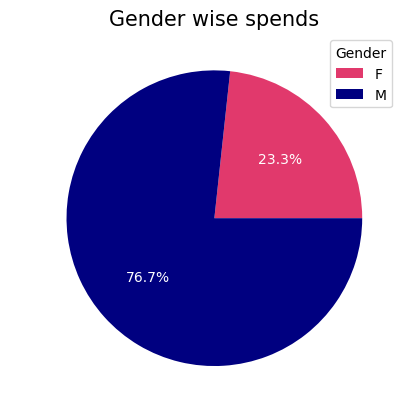

In [29]:
cleaned_df.groupby('Gender')['Purchase'].sum().plot(kind = 'pie', autopct = '%1.1f%%', colors=['#E1396C', '#000080'],textprops={'color': 'white'})

plt.title('Gender wise spends', fontsize = 15)
plt.ylabel(" ")
plt.legend(title="Gender", loc="best")
plt.show()

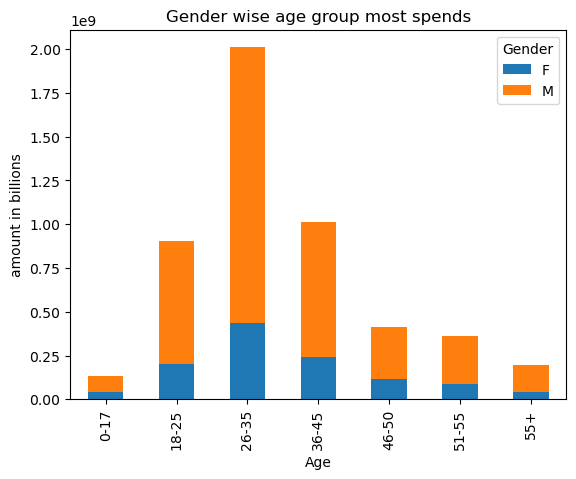

In [30]:
#age group of female and male that spends the most.
age_spend = cleaned_df.groupby(['Age', 'Gender'])['Purchase'].sum()
unstack = age_spend.unstack()
unstack.plot(kind = 'bar', stacked = True)  
plt.title('Gender wise age group most spends', fontsize = 12)
plt.xlabel('Age')
plt.ylabel('amount in billions')
plt.show()

In [31]:
cleaned_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,current_city_years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,1,2,0,3,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,1,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,1,2,0,12,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,1,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,3,4,0,8,8.0,16.0,7969


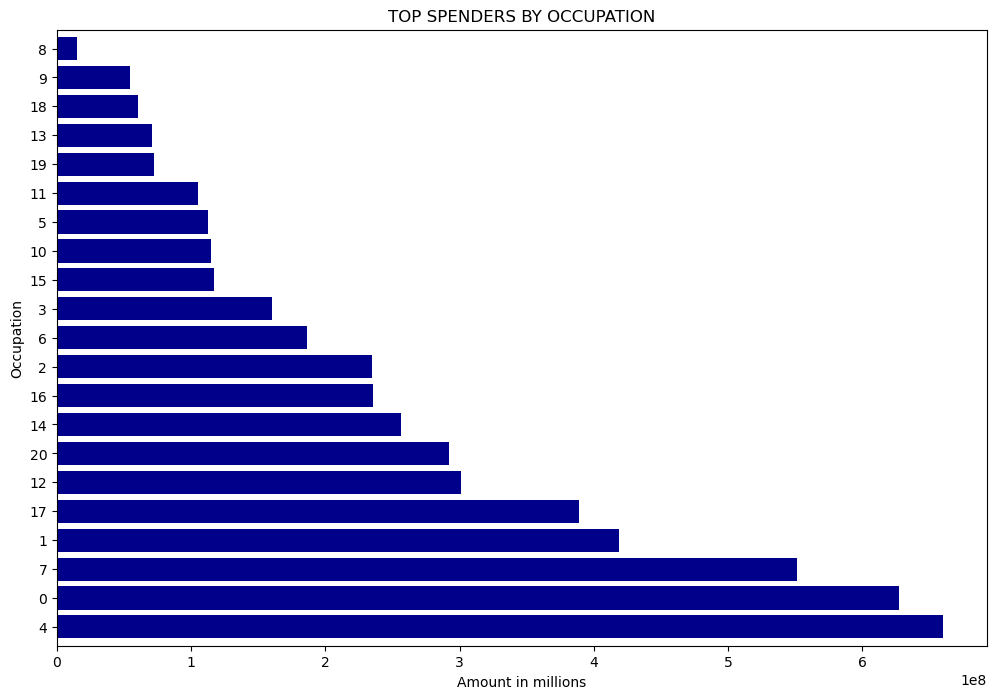

In [32]:
plt.figure(figsize=(12, 8))
cleaned_df.groupby('Occupation')['Purchase'].sum().sort_values(ascending=False).plot(kind='barh', color='darkblue', width=0.8)
plt.title('TOP SPENDERS BY OCCUPATION')
plt.xlabel('Amount in millions')
plt.show()

In [33]:
cleaned_df['City_Category'] = cleaned_df['City_Category'].astype(str).replace({'1': 'A', '2' : 'B', '3' : 'C'})
cleaned_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,current_city_years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,8.0,16.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,8.0,16.0,371
550065,1006036,P00375436,F,26-35,15,B,4,1,20,8.0,16.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,8.0,16.0,365


In [34]:
#hypothsis testing
#H1: Customers aged 26-35 are the highest spenders during Black Friday.

Text(0, 0.5, 'Amount in bilions')

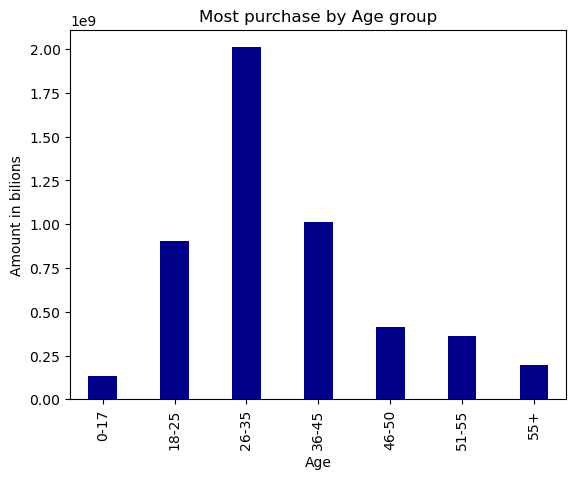

In [35]:
cleaned_df.groupby('Age')['Purchase'].sum().plot(kind='bar', width = 0.4, color = 'darkblue')
plt.title('Most purchase by Age group', fontsize = 12)
plt.xlabel('Age')
plt.ylabel('Amount in bilions')


In [36]:
#26-35 age group are the most spenders for this black friday sale. first hypothesis right.


In [37]:
#Hypothesis 2-  unmarried people buy more than married people

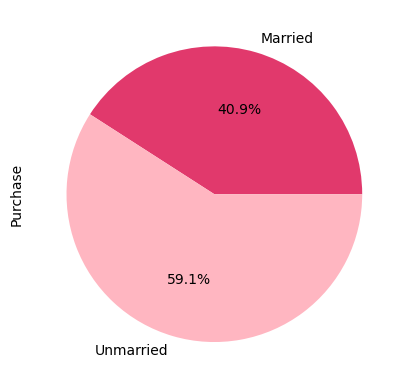

In [38]:
#Hypothesis 2- married people buy more than unmarried people
cleaned_df['Marital_Status'] = cleaned_df['Marital_Status'].astype(str).replace({'0' : 'Unmarried', '1' : 'Married'})
cleaned_df.groupby('Marital_Status')['Purchase'].sum().plot(kind = 'pie', autopct ='%1.1f%%', colors=['#E1396C', 'lightpink'])
plt.show()

In [39]:
#hypothesis 3 - City Category "1(A)" has the highest sales volume compared to B & C

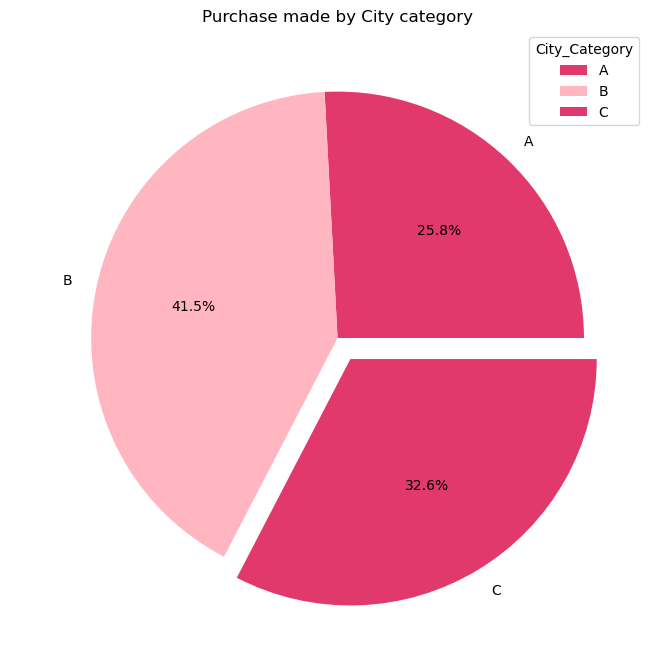

In [40]:
explode = [0,0,0.1]
plt.figure(figsize=(12, 8))
cleaned_df.groupby('City_Category')['Purchase'].sum().plot(kind = 'pie', explode =explode ,autopct = '%1.1f%%', colors=['#E1396C', 'lightpink'])

plt.title('Purchase made by City category', fontsize =12)
plt.legend(title = "City_Category", loc = "upper right" )
plt.ylabel(" ")
plt.show()

In [41]:
#inference from the plot is tier 2(B) spends the most during the black friday

In [42]:
#hypothesis married people between 36-45 spend the most


# DATA ANALYSIS ON MARRIED PEOPLE

In [43]:
married = cleaned_df[cleaned_df['Marital_Status'] == 'Married']


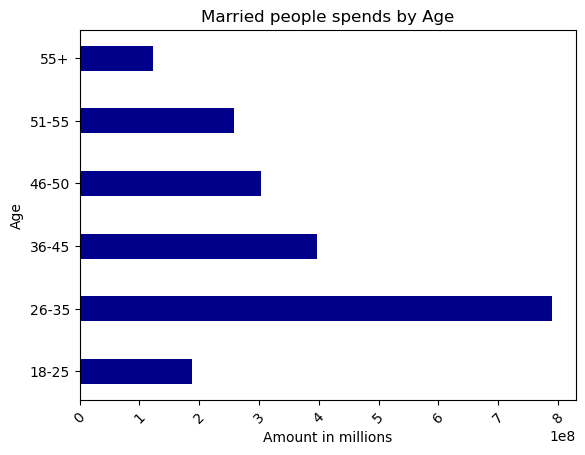

In [44]:
married.groupby('Age')['Purchase'].sum().plot(kind = 'barh', width = 0.4,color = 'darkblue')
plt.title('Married people spends by Age')
plt.ylabel('Age')
plt.xlabel('Amount in millions')
plt.xticks(rotation =45)
plt.show()

# Married people between 26-35 spends the most 

# top product_id (products) bought repetedly by married people vs unmarried people between the age (26-35)

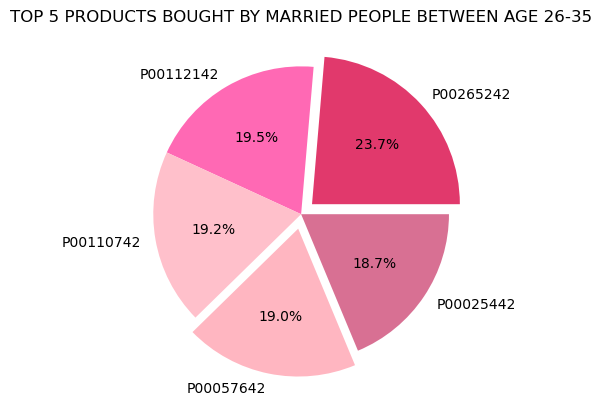

In [45]:
married_2635 = married[married['Age'] == '26-35'] 
explode = [0.1,0,0,0.1,0]


married_2635['Product_ID'].value_counts().head(5).plot(kind = 'pie', autopct = '%1.1f%%',colors = ['#E1396C', '#FF69B4', '#FFC0CB', '#FFB6C1', '#D87093'], explode = explode)
plt.ylabel(" ")
plt.title('TOP 5 PRODUCTS BOUGHT BY MARRIED PEOPLE BETWEEN AGE 26-35')
plt.show()

# married people purchase by city category (A,B,C?) age b/w 26-35

# top spenders by occupation 

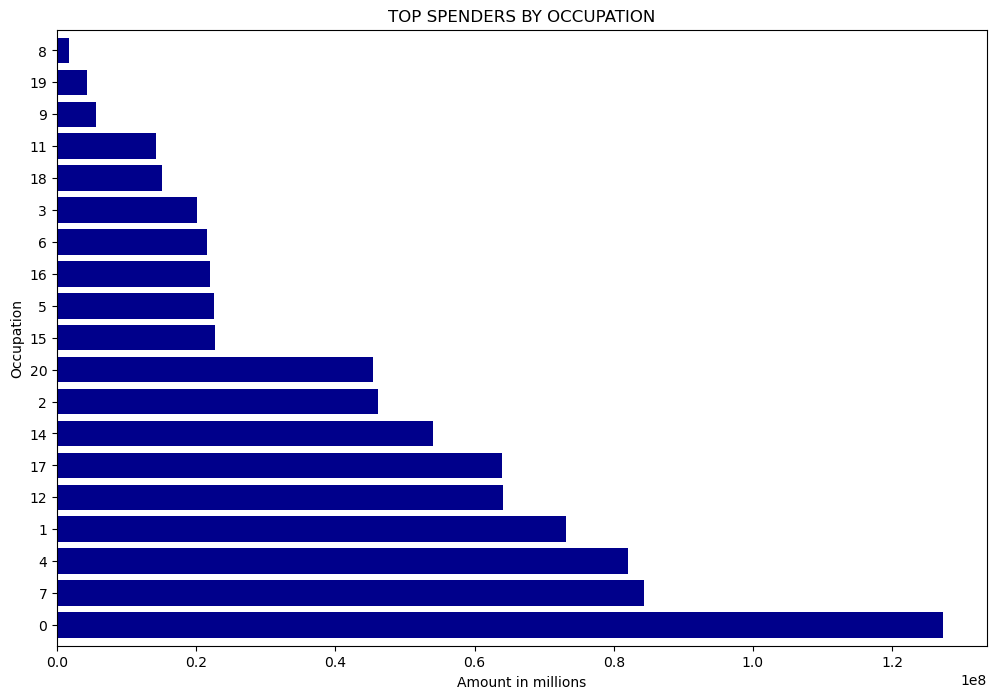

In [46]:
plt.figure(figsize=(12, 8))
married_2635.groupby('Occupation')['Purchase'].sum().sort_values(ascending=False).plot(kind='barh', color='darkblue', width=0.8)
plt.title('TOP SPENDERS BY OCCUPATION')
plt.xlabel('Amount in millions')
plt.show()

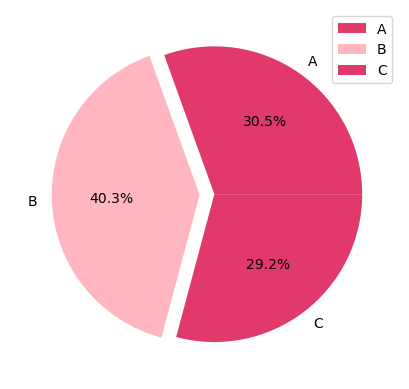

In [47]:
explode = [0,0.1,0]
married_2635.groupby('City_Category')['Purchase'].sum().plot(kind = 'pie', autopct = '%1.1f%%',explode = explode, colors =['#E1396C', 'lightpink'])
plt.ylabel(" ")
plt.legend( )


# Tier 2(B) contributes most during the black friday.

# Lets explore how many have been living in the city for longest and identify patterns on purchasing habits
# people moved in recently may have spent more as they are still rummaging items/products for usage.

# 5.	H5: Customers who have stayed longer in a city (4+ years) tend to spend less.

<Axes: xlabel='current_city_years'>

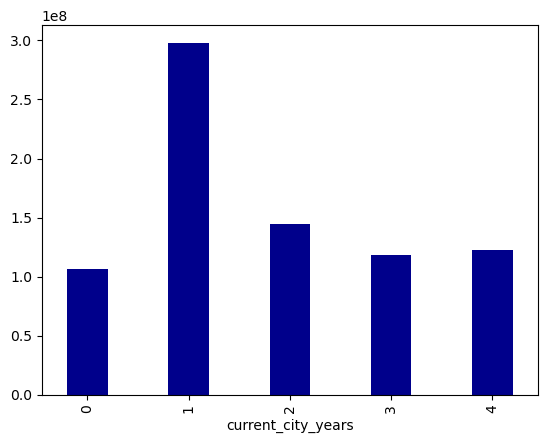

In [48]:
married_2635.groupby('current_city_years')['Purchase'].sum().plot(kind = 'bar', width = 0.4,color = 'darkblue')

# PEOPLE LIVING IN THE CITY FOR 1 YEAR TENDS TO SPEND MORE THAN WHO ARE COMFORTABLLY LIVING FOR MORE THAN 1 YEARS. 

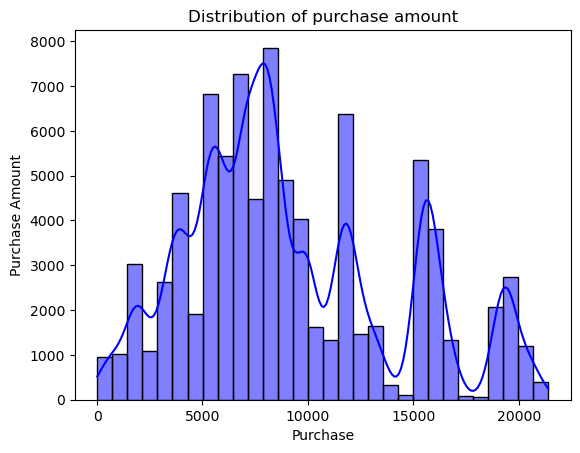

In [49]:
sns.histplot(married_2635['Purchase'], bins=30, kde=True,color = 'blue')
plt.title("Distribution of purchase amount")
plt.ylabel('No. of Purchases made')
plt.ylabel("Purchase Amount")
plt.show()

# the graph suggests multiple modal distribution, we will have to further segment the customer by low mid and high spenders.

In [50]:
def categorize_spender(amount):
    if amount < 4500:
        return 'Low Spender'
    elif amount < 11500:
        return 'Mid Spender'
    else:
        return 'High Spender'

married_2635['spender_category'] = married_2635['Purchase'].apply(categorize_spender)
married_2635.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,current_city_years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,spender_category
9,1000005,P00274942,M,26-35,20,A,1,Married,8,8.0,16.0,7871,Mid Spender
10,1000005,P00251242,M,26-35,20,A,1,Married,5,11.0,16.0,5254,Mid Spender
11,1000005,P00014542,M,26-35,20,A,1,Married,8,8.0,16.0,3957,Low Spender
12,1000005,P00031342,M,26-35,20,A,1,Married,8,8.0,16.0,6073,Mid Spender
13,1000005,P00145042,M,26-35,20,A,1,Married,1,2.0,5.0,15665,High Spender


# understanding the spread of different spenders in the between married people

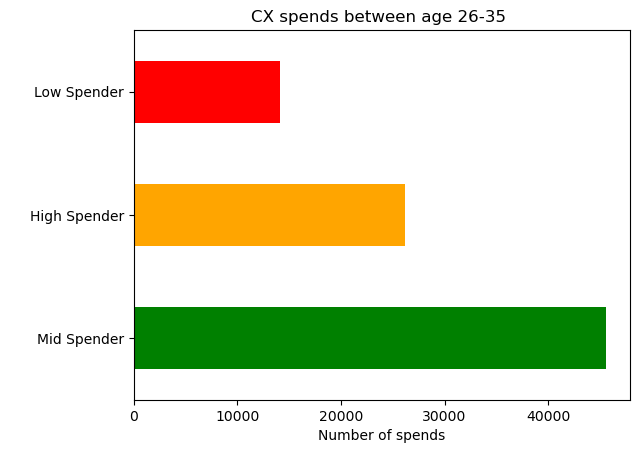

In [51]:
married_2635['spender_category'].value_counts().plot(kind = 'barh', color = ["green", "orange", "red"])
plt.title('CX spends between age 26-35 ')
plt.xlabel('Number of spends')
plt.ylabel(" ")
plt.show()

In [52]:
# TOP 10 MARRIED CUSTOMERS SPENING MOST DURING BLACK FRIDAY Products 

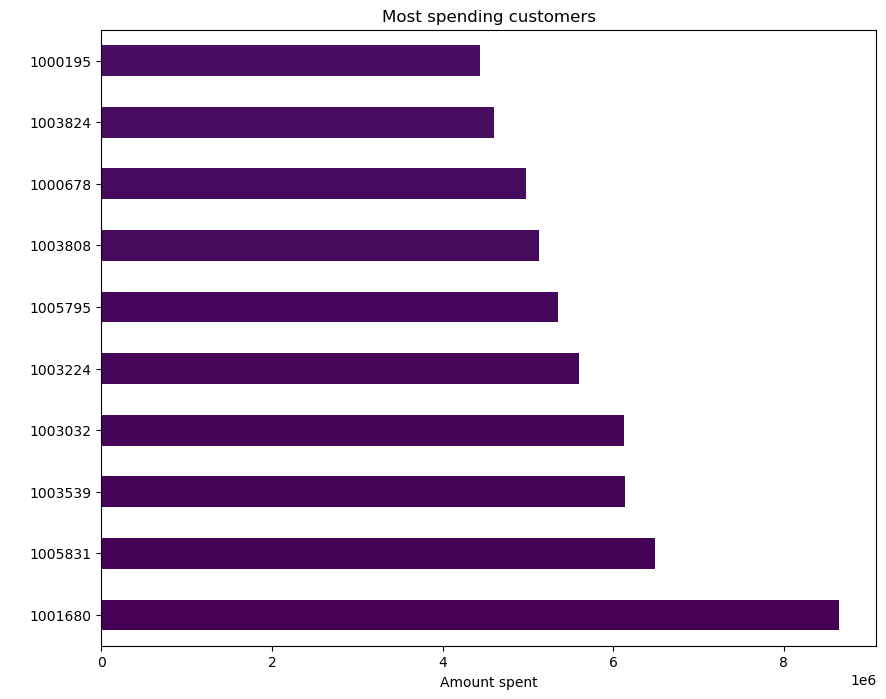

In [53]:
plt.figure(figsize = (10,8))
colors = plt.cm.viridis(range(10))
married_2635.groupby(['User_ID'])['Purchase'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh',color = colors)
plt.ylabel(" ")
plt.title('Most spending customers')
plt.xlabel('Amount spent')
plt.show()

# no. of married people and their spending habbits.

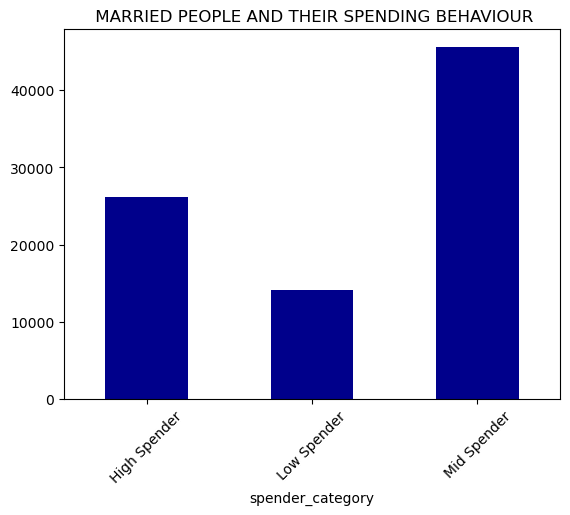

In [54]:
married_2635.groupby('spender_category')['User_ID'].count().plot(kind = 'bar',color = 'darkblue' )
plt.title(" MARRIED PEOPLE AND THEIR SPENDING BEHAVIOUR")
plt.xticks(rotation = 45)
plt.show()

In [55]:
#identifying which city category has what kinds of spenders and is there a pattern.
cat_a = married_2635[married_2635['City_Category'] == 'A']
cat_b = married_2635[married_2635['City_Category'] == 'B']
cat_c = married_2635[married_2635['City_Category'] == 'C']


In [56]:
count_a = cat_a['spender_category'].value_counts()
count_b = cat_b['spender_category'].value_counts()
count_c = cat_c['spender_category'].value_counts()


In [57]:
abc = pd.DataFrame({
    'City A': count_a,
    'City B': count_b,
    'City C': count_c
})

abc

,City A,City B,City C
spender_category,,,
Mid Spender,15168,18581,11822
High Spender,7457,10435,8322
Low Spender,4620,6250,3279


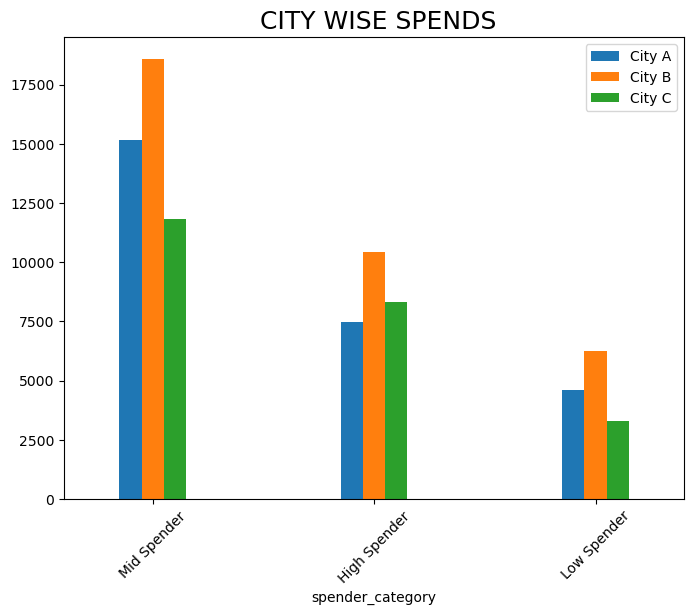

In [58]:
abc.plot(kind='bar',  width = 0.3, figsize=(8,6))
plt.title(" CITY WISE SPENDS", fontsize = 18)
plt.xticks( rotation = 45)
plt.show()

# visual trend suggests there are more mid_spenders in each of the city A,B,C

# Analysing on unmarried people and their spending patterns

In [59]:
unmarried_2635 = cleaned_df[cleaned_df['Marital_Status'] == 'Unmarried']
unmarried_2635

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,current_city_years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,Unmarried,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550056,1006022,P00375436,M,26-35,17,C,4,Unmarried,20,8.0,16.0,254
550059,1006025,P00370853,F,26-35,1,B,1,Unmarried,19,8.0,16.0,48
550062,1006032,P00372445,M,46-50,7,A,3,Unmarried,20,8.0,16.0,473
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,20,8.0,16.0,371


# unmarried people spends by age

<Axes: ylabel='Age'>

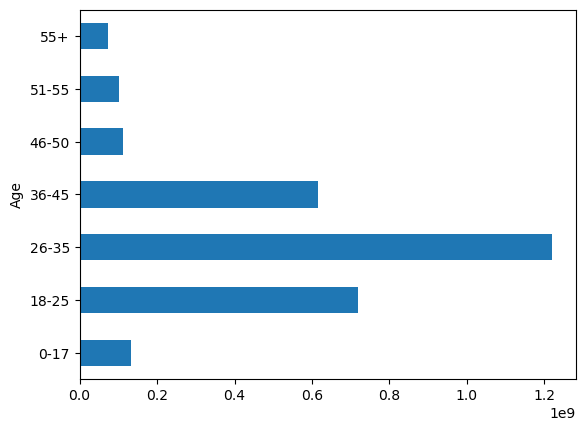

In [60]:
unmarried_2635.groupby('Age')['Purchase'].sum().plot(kind = 'barh')

# age category that spends thr most remains 26-35 between married and unmarried however, unmarried people spend lesser than married due to lesser requirements.

# due to the business requirement we will analyse patterns in spending across various factors.

In [61]:
unmarr_2635 = unmarried_2635[unmarried_2635['Age'] == '26-35']

In [62]:
unmarr_2635

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,current_city_years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
5,1000003,P00193542,M,26-35,15,A,3,Unmarried,1,2.0,16.0,15227
25,1000009,P00135742,M,26-35,17,C,0,Unmarried,6,8.0,16.0,16662
26,1000009,P00039942,M,26-35,17,C,0,Unmarried,8,8.0,16.0,5887
27,1000009,P00161442,M,26-35,17,C,0,Unmarried,5,14.0,16.0,6973
28,1000009,P00078742,M,26-35,17,C,0,Unmarried,5,8.0,14.0,5391
...,...,...,...,...,...,...,...,...,...,...,...,...
550051,1006013,P00375436,F,26-35,20,C,3,Unmarried,20,8.0,16.0,489
550055,1006019,P00372445,M,26-35,0,A,4,Unmarried,20,8.0,16.0,238
550056,1006022,P00375436,M,26-35,17,C,4,Unmarried,20,8.0,16.0,254
550059,1006025,P00370853,F,26-35,1,B,1,Unmarried,19,8.0,16.0,48


In [63]:
# lets segment customers based on spends.
#recalling the function created above

In [64]:
unmarr_2635['spender_category'] = unmarr_2635['Purchase'].apply(categorize_spender)
unmarr_2635

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,current_city_years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,spender_category
5,1000003,P00193542,M,26-35,15,A,3,Unmarried,1,2.0,16.0,15227,High Spender
25,1000009,P00135742,M,26-35,17,C,0,Unmarried,6,8.0,16.0,16662,High Spender
26,1000009,P00039942,M,26-35,17,C,0,Unmarried,8,8.0,16.0,5887,Mid Spender
27,1000009,P00161442,M,26-35,17,C,0,Unmarried,5,14.0,16.0,6973,Mid Spender
28,1000009,P00078742,M,26-35,17,C,0,Unmarried,5,8.0,14.0,5391,Mid Spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550051,1006013,P00375436,F,26-35,20,C,3,Unmarried,20,8.0,16.0,489,Low Spender
550055,1006019,P00372445,M,26-35,0,A,4,Unmarried,20,8.0,16.0,238,Low Spender
550056,1006022,P00375436,M,26-35,17,C,4,Unmarried,20,8.0,16.0,254,Low Spender
550059,1006025,P00370853,F,26-35,1,B,1,Unmarried,19,8.0,16.0,48,Low Spender


# spends and revenue generated by unmarried people through different kinds of transactions. 

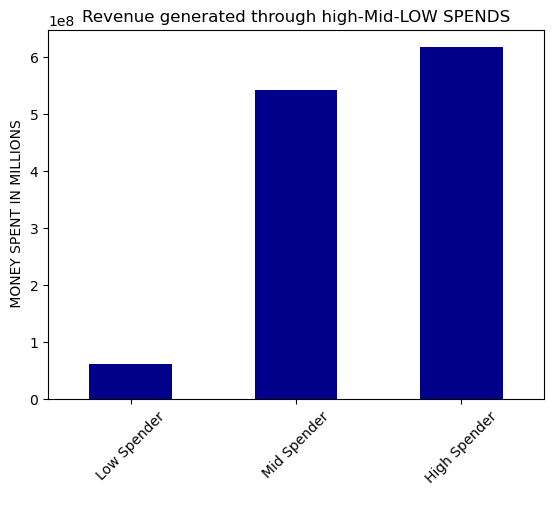

In [65]:
unmarr_2635.groupby('spender_category')['Purchase'].sum().sort_values().plot(kind = 'bar', color = 'darkblue')
plt.title('Revenue generated through high-Mid-LOW SPENDS' )
plt.xlabel(" ")
plt.ylabel(" MONEY SPENT IN MILLIONS")
plt.xticks(rotation = 45)
plt.show()


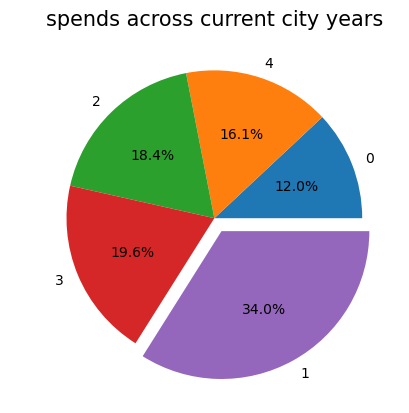

In [66]:
explode = [0,0,0,0,0.1]
unmarr_2635.groupby('current_city_years')['Purchase'].sum().sort_values().plot(kind = 'pie', autopct = '%1.1f%%',explode = explode)
plt.title( 'spends across current city years',fontsize = 15)
plt.ylabel(" ")
plt.show()

# pattern seems to be the same in unmarried people, people who have recently settled in a city spends and require more products than others

<Axes: xlabel='spender_category'>

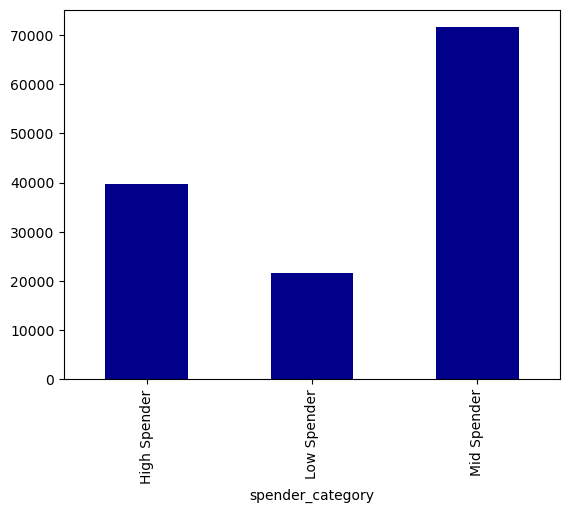

In [67]:
unmarr_2635.groupby('spender_category')['User_ID'].count().plot(kind = 'bar',color = 'darkblue' )

In [68]:
#There are more mid range spenders under unmarried people who belong to 26-35 age group.


# preprocessing, feature engineering the dataframe cleaned_df that hosts the information of all the sales during black friday

In [69]:
cleaned_df.isnull().sum()

User_ID               0
Product_ID            0
Gender                0
Age                   0
Occupation            0
City_Category         0
current_city_years    0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
Purchase              0
dtype: int64

In [70]:
cleaned_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,current_city_years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,Unmarried,8,8.0,16.0,7969


In [71]:
#replacing columns to numerics

In [72]:
replacement = {
    'Gender' : {'F' : '0' , 'M' : '1' },
    'Marital_Status' : {'Unmarried' : '0' , 'Married': '1'  },
    'City_Category' : {'A': '1' , 'B': '2', 'C' :'3'}}
cleaned_df = cleaned_df.replace(replacement)

In [73]:
#changing data types

In [74]:
cleaned_df[['Gender', 'Marital_Status', 'City_Category']]=cleaned_df[['Gender', 'Marital_Status', 'City_Category']].astype(int)

In [75]:
cleaned_df.dtypes

User_ID                 int64
Product_ID             object
Gender                  int64
Age                    object
Occupation              int64
City_Category           int64
current_city_years      int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

In [76]:
thresold = cleaned_df['Purchase'].quantile(0.70)
cleaned_df['High_spender'] = cleaned_df['Purchase'].apply(lambda x: 1 if x >= thresold  else 0)
cleaned_df['High_spender'].value_counts()


High_spender
0    383143
1    164248
Name: count, dtype: int64

In [77]:
cleaned_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,current_city_years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,High_spender
0,1000001,P00069042,0,0-17,10,1,2,0,3,4.0,16.0,8370,0
1,1000001,P00248942,0,0-17,10,1,2,0,1,6.0,14.0,15200,1
2,1000001,P00087842,0,0-17,10,1,2,0,12,4.0,16.0,1422,0
3,1000001,P00085442,0,0-17,10,1,2,0,12,14.0,16.0,1057,0
4,1000002,P00285442,1,55+,16,3,4,0,8,8.0,16.0,7969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,51-55,13,2,1,1,20,8.0,16.0,368,0
550064,1006035,P00375436,0,26-35,1,3,3,0,20,8.0,16.0,371,0
550065,1006036,P00375436,0,26-35,15,2,4,1,20,8.0,16.0,137,0
550066,1006038,P00375436,0,55+,1,3,2,0,20,8.0,16.0,365,0


In [78]:
model_test = cleaned_df.copy()

In [79]:
# preparing dataset for baseline model

In [80]:
#transofrming features such as avg_purchase and 

In [81]:
model_test['Avg_purchase'] =  model_test.groupby('User_ID')['Purchase'].transform('mean').round(2)
model_test['Total_spent'] = model_test.groupby('User_ID')['Purchase'].transform('sum')

In [82]:
model_test = model_test.drop(columns = { 'Purchase'})

In [83]:
model_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,current_city_years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,High_spender,Avg_purchase,Total_spent
0,1000001,P00069042,0,0-17,10,1,2,0,3,4.0,16.0,0,9545.51,334093
1,1000001,P00248942,0,0-17,10,1,2,0,1,6.0,14.0,1,9545.51,334093
2,1000001,P00087842,0,0-17,10,1,2,0,12,4.0,16.0,0,9545.51,334093
3,1000001,P00085442,0,0-17,10,1,2,0,12,14.0,16.0,0,9545.51,334093
4,1000002,P00285442,1,55+,16,3,4,0,8,8.0,16.0,0,10525.61,810472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,51-55,13,2,1,1,20,8.0,16.0,0,13940.08,501843
550064,1006035,P00375436,0,26-35,1,3,3,0,20,8.0,16.0,0,6293.72,956645
550065,1006036,P00375436,0,26-35,15,2,4,1,20,8.0,16.0,0,7947.81,4069279
550066,1006038,P00375436,0,55+,1,3,2,0,20,8.0,16.0,0,7502.83,90034


In [84]:
model_test[['Avg_purchase', 'Total_spent']] = model_test[['Avg_purchase', 'Total_spent']].astype(float)

In [85]:
 #scaling features like avg_purchase and total_spent using min max scaler

In [86]:
from sklearn.preprocessing import MinMaxScaler


In [87]:
scaler = MinMaxScaler()

In [88]:
model_test[['Avg_purchase', 'Total_spent']] = scaler.fit_transform(model_test[['Avg_purchase', 'Total_spent']])

In [89]:
model_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,current_city_years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,High_spender,Avg_purchase,Total_spent
0,1000001,P00069042,0,0-17,10,1,2,0,3,4.0,16.0,0,0.444474,0.027701
1,1000001,P00248942,0,0-17,10,1,2,0,1,6.0,14.0,1,0.444474,0.027701
2,1000001,P00087842,0,0-17,10,1,2,0,12,4.0,16.0,0,0.444474,0.027701
3,1000001,P00085442,0,0-17,10,1,2,0,12,14.0,16.0,0,0.444474,0.027701
4,1000002,P00285442,1,55+,16,3,4,0,8,8.0,16.0,0,0.504754,0.073616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,51-55,13,2,1,1,20,8.0,16.0,0,0.714757,0.043869
550064,1006035,P00375436,0,26-35,1,3,3,0,20,8.0,16.0,0,0.244477,0.087704
550065,1006036,P00375436,0,26-35,15,2,4,1,20,8.0,16.0,0,0.346210,0.387706
550066,1006038,P00375436,0,55+,1,3,2,0,20,8.0,16.0,0,0.318842,0.004178


In [90]:
# using one-hot encoding for column age

In [91]:
model_test = pd.get_dummies(model_test, columns=['Age'], drop_first=True, dtype=int)



In [92]:
model_test.drop(columns = ['User_ID', 'Product_ID'], inplace = True)

In [93]:
model_test

,Gender,Occupation,City_Category,current_city_years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,High_spender,Avg_purchase,Total_spent,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,0,10,1,2,0,3,4.0,16.0,0,0.444474,0.027701,0,0,0,0,0,0
1,0,10,1,2,0,1,6.0,14.0,1,0.444474,0.027701,0,0,0,0,0,0
2,0,10,1,2,0,12,4.0,16.0,0,0.444474,0.027701,0,0,0,0,0,0
3,0,10,1,2,0,12,14.0,16.0,0,0.444474,0.027701,0,0,0,0,0,0
4,1,16,3,4,0,8,8.0,16.0,0,0.504754,0.073616,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,13,2,1,1,20,8.0,16.0,0,0.714757,0.043869,0,0,0,0,1,0
550064,0,1,3,3,0,20,8.0,16.0,0,0.244477,0.087704,0,1,0,0,0,0
550065,0,15,2,4,1,20,8.0,16.0,0,0.346210,0.387706,0,1,0,0,0,0
550066,0,1,3,2,0,20,8.0,16.0,0,0.318842,0.004178,0,0,0,0,0,1


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report

In [95]:
y = model_test.pop('High_spender')

In [96]:
X = model_test

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify = y, random_state =42)

In [98]:
t_model = DecisionTreeClassifier()

In [99]:
t_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [102]:
y_pred = t_model.predict(X_test)

In [103]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     76629
           1       0.80      0.79      0.80     32850

    accuracy                           0.88    109479
   macro avg       0.86      0.86      0.86    109479
weighted avg       0.88      0.88      0.88    109479



# dataset slightly imbalanced, so we apply over sampling SMOTE

In [104]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 0.5 , random_state = 42)

In [105]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# hyperparameter_tuning via grid search

In [106]:
from sklearn.model_selection import GridSearchCV

# finding out the best hyperparameters for the decision tree model

In [174]:
param_grid = {'max_depth' : [5,10,15],
              'min_samples_split' : [2,5,8]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state =42), param_grid,cv = 6, scoring ='precision')

In [175]:
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 8]},
             scoring='precision')

In [176]:
best_param = grid_search.best_params_
print ('best parameters:' ,best_param  )

best parameters: {'max_depth': 15, 'min_samples_split': 5}


In [ ]:
#training the model after grid search with best hyperparameters.


In [177]:
model1 = DecisionTreeClassifier(**best_param, random_state = 42)

In [178]:
model1.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=15, min_samples_split=5, random_state=42)

In [179]:
ypred1 = model1.predict(X_test)

In [180]:
print( classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93     76629
           1       0.79      0.92      0.85     32850

    accuracy                           0.90    109479
   macro avg       0.88      0.91      0.89    109479
weighted avg       0.91      0.90      0.90    109479



In [ ]:
print( classification_report(y_test , y_pred),               
      
      
      "the base model")

In [126]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [127]:
y_pred2 = rf.predict(X_test)

In [128]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     76629
           1       0.80      0.87      0.83     32850

    accuracy                           0.90    109479
   macro avg       0.87      0.89      0.88    109479
weighted avg       0.90      0.90      0.90    109479



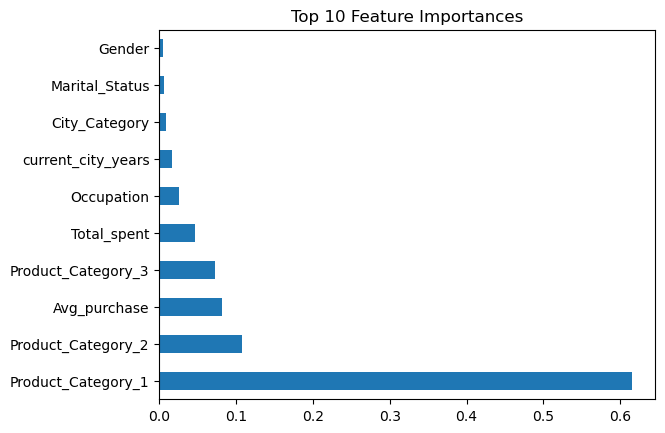

In [186]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()